###### The Skimage library allows us to use Python to perform image processing. 
The language is quite easy to grasp, but it performs some of the most difficult tasks. To get started, I imported few basic libraries.

In [1]:
import glob
import skimage.io
import numpy as np
import sklearn
import os
import skimage
import matplotlib.pyplot as plt  
import cv2

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn import model_selection

np.random.seed(42)

###### Converting Sample files to respective Dataframes

Here, I loaded images from their respective folders and performed following operations-

Resize - I matched the size of all images to 32x32 as this is very important to understand the structure if image.

The images in raw data are in format of BGR/RGB color space which is defined by the three chromaticities of the red, green, and blue additive primaries(In simple words - they are made from Red,blue, green colored lights stacked). Grascale is a way to reduce dimention as it have only two colors black and white. Here, Each pixel have three colors and all these colors have luminance which can be summed for each pixel.

Function Loadfiles - allows us to extract texture class paths from respective sub-directories.

Function read_images - creates the single image array and image_path files arra for further usage.

In [2]:

def read_images(images_files, images_arr, imgs_path):
    
    for folder in os.listdir(images_files):
                
        # Get the path name of the image
        img_path = os.path.join(os.path.join(images_files), folder)
        
        # Open and resize the img
        img = skimage.io.imread(img_path)
        img = cv2.resize(img, (32,32))
        imgs_path.append(img_path)
        images_arr.append(img)
    
    return images_arr,imgs_path

In [3]:
data_train = os.path.join(os.getcwd(),"textures/training/")
data_train.replace(os.sep, '/')
data_test = os.path.join(os.getcwd(),"textures/testing/")
data_test.replace(os.sep, '/')


def loadfiles(data): 
    images_array=[]
    img_path=[]
    for file in os.listdir(data_train):
        
        # Get the path name of the image
        file_path = os.path.join(os.path.join(data), file)
        print(file_path)
        images_array,img_path =read_images(file_path,images_array,img_path )
    images_array = np.array(images_array)
    return images_array,img_path


dataset_train,train_img_path = loadfiles(data_train)
dataset_test,test_img_path = loadfiles(data_test)   

C:\Users\Barghavi\Desktop\CNN\textures/training/canvas1
C:\Users\Barghavi\Desktop\CNN\textures/training/cushion1
C:\Users\Barghavi\Desktop\CNN\textures/training/linsseeds1
C:\Users\Barghavi\Desktop\CNN\textures/training/sand1
C:\Users\Barghavi\Desktop\CNN\textures/training/seat2
C:\Users\Barghavi\Desktop\CNN\textures/training/stone1
C:\Users\Barghavi\Desktop\CNN\textures/testing/canvas1
C:\Users\Barghavi\Desktop\CNN\textures/testing/cushion1
C:\Users\Barghavi\Desktop\CNN\textures/testing/linsseeds1
C:\Users\Barghavi\Desktop\CNN\textures/testing/sand1
C:\Users\Barghavi\Desktop\CNN\textures/testing/seat2
C:\Users\Barghavi\Desktop\CNN\textures/testing/stone1


### 1.1 Getting started

Dataset extraction from images
Note :
Class 0 - dissimilar images pair
Class 1 - similar images pair

Pairing the images and geneating labels:
    The pairs of images are created in the format of N(N-1). Then to generate labels the image texture files names are extracted and used to match similarit and dissimilarity over the paired images.

In [4]:
#Creates a numpy matrix for every pairs of images
def pairing_images(images_arr):
    df = []
    for i in range(len(images_arr)):
        for j in range((i+1), len(images_arr)):
            df.append(np.concatenate((images_arr[i], images_arr[j]), axis=0))
    df = np.array(df)
    return df

In [5]:
#Creating labels :0 - dissimilar, 1 - similar for pairs of images
def create_labels(img_files):

    imgs_class = []
    label = []
    
    # Find image texture's class
    for class_b in img_files:
        _, tail = os.path.split(class_b)
        labl = os.path.splitext(tail)[0]
        labl_name=labl.split('-')[0]
        imgs_class.append(labl_name)
        
    label = labelling(imgs_class)
    return label
    

In [6]:
def labelling(imgs_class):
    
    labels = []
    # Assign labels to pairs of images
    for img1 in range(len(imgs_class)):
        for img2 in range((img1+1), len(imgs_class)):
            img1_l = imgs_class[img1]
            img2_l = imgs_class[img2]
            if img1_l == img2_l:
                labels.append('1')
            else:
                labels.append('0')
    labels = np.array(labels)
    return labels

In [7]:
#partitioning the extracted image arrays and paired images into test and train data formats
def mk_dataset(training_imgs, testing_imgs):
    training_imgs_arr,train_img_path = loadfiles(training_imgs)
    testing_imgs_arr,test_img_path = loadfiles(testing_imgs)

    print('Shape of images stored in array for Train set :',training_imgs_arr.shape)
    print('Shape of images stored in array for Test set :',testing_imgs_arr.shape)
    
    train_data = pairing_images(training_imgs_arr)
    test_data = pairing_images(testing_imgs_arr)
    
    train_labels = create_labels(train_img_path).astype('int')
    test_labels = create_labels(test_img_path).astype('int')
    
    print('\n')
    print('Shape of dataset created (images in pairs)')
    print('Train data :',train_data.shape)
    print('Train labels:',train_labels.shape)
    print('Test data:',test_data.shape)
    print('Test labels:',test_labels.shape)
    
    return train_data, test_data, train_labels, test_labels

In [8]:
train_ds, test_ds, train_labels, test_labels = mk_dataset(data_train, data_test)

C:\Users\Barghavi\Desktop\CNN\textures/training/canvas1
C:\Users\Barghavi\Desktop\CNN\textures/training/cushion1
C:\Users\Barghavi\Desktop\CNN\textures/training/linsseeds1
C:\Users\Barghavi\Desktop\CNN\textures/training/sand1
C:\Users\Barghavi\Desktop\CNN\textures/training/seat2
C:\Users\Barghavi\Desktop\CNN\textures/training/stone1
C:\Users\Barghavi\Desktop\CNN\textures/testing/canvas1
C:\Users\Barghavi\Desktop\CNN\textures/testing/cushion1
C:\Users\Barghavi\Desktop\CNN\textures/testing/linsseeds1
C:\Users\Barghavi\Desktop\CNN\textures/testing/sand1
C:\Users\Barghavi\Desktop\CNN\textures/testing/seat2
C:\Users\Barghavi\Desktop\CNN\textures/testing/stone1
Shape of images stored in array for Train set : (180, 32, 32)
Shape of images stored in array for Test set : (60, 32, 32)


Shape of dataset created (images in pairs)
Train data : (16110, 64, 32)
Train labels: (16110,)
Test data: (1770, 64, 32)
Test labels: (1770,)


#### Dataset generation summary:
    Intially, the whole image pair array is divided into train and test data.
        train image pairs - 16,110
        test image pairs - 1,770.
    Then the train data is further divided into train and validation data.
        train image pairs - 12,726
        validation image pairs - 3,384(20% of train data is used for validation).
Labelling id done based on similarity of the texture class - 1's(similar) and 0's(dissimilar). 

In [9]:
def dataset_reshape(dataset, model_type):
    if model_type == 'TM':
        return dataset.reshape(dataset.shape[0],2,32,32)
    elif model_type == 'MLP':
            return dataset.reshape(dataset.shape[0],dataset.shape[1]*dataset.shape[2])
    else:
        print('Enter model  type as TM or MLP')

###### Train and validation test split:
    train_test_split method from sklearn is used to split the data into desired shape of train and validation datasets.

In [10]:
# Train and validation test split
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(train_ds, train_labels, test_size=0.21,
                                                                         stratify=train_labels, random_state=0)
print('Train data size -',X_train.shape)
print('Validation data size -',X_val.shape)

Train data size - (12726, 64, 32)
Validation data size - (3384, 64, 32)


###### Computing the sum of squared differences (SSD) between two images:
    The sum of squared differences (SSD) is a match metric based on the intensity differences between the two images at the pixel level. The sum of squared for the product of pixels subtraction between two images is calculated.

In [11]:
def calculate_ssd(imageA, imageB):
    """Computing the sum of squared differences (SSD) between two images."""
    if imageA.shape[0] != imageB.shape[0]:
        print("Images don't have the same shape.")
        return
    return (np.sum((imageA - imageB)**2)/(32*32))

### 1.2 Template matching

In [12]:
# Function to decide similarity based on ssd scores
def base_template_match(img_pairs):
    ssd_score = []
    for imgs in range(len(img_pairs)):
        imageA = img_pairs[imgs][0]
        imageB = img_pairs[imgs][1]
        ssd_score.append(calculate_ssd(imageA, imageB))
    ssd_score = np.array(ssd_score)
    
    pred = np.empty(ssd_score.shape[0])
    for scr in range(len(ssd_score)):
        if ssd_score[scr] >= 0.039:
            val = 0
        else:
            val = 1
        pred[scr] = val
    pred = pred.astype('int')
    
    return pred, ssd_score

In [13]:
# Function to return accuracy and loss scores of template matching method
def temp_match_score(labels, prediction):
    comp = labels == prediction
    right = sum(comp == True)
    wrong = sum(comp == False)
    acc = right/len(comp)
    loss = wrong/len(comp)
    return acc, loss

In [14]:
# Function to validate template match on validation and test sets
def validate_temp_match(val_set, val_label):
    val_pred, val_sim_score = base_template_match(val_set)
    val_acc, val_loss = temp_match_score(val_label, val_pred)
    print('Accuracy: {:.2f}%'.format(val_acc*100))
    print('Loss: {:.2f}%'.format(val_loss*100))
    return val_acc, val_loss

###### Reshape and normalize:
Reshapes the dataset based on the input parameter to 'TM' - template match or 'MLP' - Perceptron. (template match needs two images as input, MLP needs an array of features for every concatenated pair of images)

In [15]:
tm_X_train = dataset_reshape(X_train, 'TM')
tm_X_val = dataset_reshape(X_val, 'TM')

# Normalize values
tm_X_train = np.multiply(tm_X_train, 1.0/255.0)
tm_X_val = np.multiply(tm_X_val, 1.0/255.0)

print('Train set size:',tm_X_train.shape)
print('Validation set size:',tm_X_val.shape)

Train set size: (12726, 2, 32, 32)
Validation set size: (3384, 2, 32, 32)


In [16]:
train_tm_pred, train_sim_score = base_template_match(tm_X_train)

In [17]:
# calculating the mean value for template_matching value to match the labels
a=0
b=0
for i in train_sim_score:
    a=a+i
b=a/len(train_sim_score)
print(b)

0.0452754528254587


###### Data Visualization Plots

I used count plots from matplotlib package to visualize the data. It is clearly evident that our data is skewed.

Imbalanced classifications present a challenge for predictive modelling because the majority of machine learning algorithms used for classification were designed with the assumption of an equal number of examples for each class.

CLASS IMBALANCE:

The imbalace in the datasetcan be clearly depicted from the count plot of the labels.
similar texture class is just approximately 20% of the total data generated.

Samples of similar's and dissimilar's-
 0    10664
1     2062
Name: label, dtype: int64


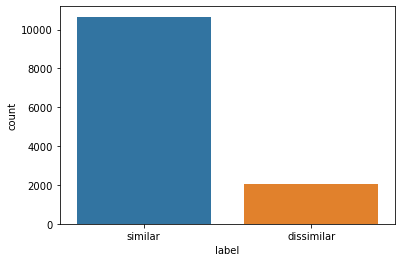

In [18]:
import pandas as pd

X_lab=np.array(Y_train)
data=pd.DataFrame({'label':X_lab})
# visualize the target variable
import matplotlib.pyplot as plt
import seaborn as sns

print("Samples of similar's and dissimilar's-\n",data['label'].value_counts())
g = sns.countplot(data['label'])
g.set_xticklabels(['similar','dissimilar'])
plt.show()


### 1.3 Perceptron

In [19]:
train_tm_acc, train_tm_loss = temp_match_score(Y_train, train_tm_pred)
print('Template matching metrics for Train set')
print('Accuracy: {:.2f}'.format(train_tm_acc*100))
print('Loss: {:.2f}'.format(train_tm_loss*100))
print("Classification report for Template matching scores: Train set")
print(sklearn.metrics.classification_report(Y_train, train_tm_pred))

Template matching metrics for Train set
Accuracy: 84.18
Loss: 15.82
Classification report for Template matching scores: Train set
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     10664
           1       0.55      0.13      0.21      2062

    accuracy                           0.84     12726
   macro avg       0.70      0.55      0.56     12726
weighted avg       0.80      0.84      0.80     12726



In [20]:
mlp_X_train = dataset_reshape(X_train, 'MLP')
mlp_X_val = dataset_reshape(X_val, 'MLP')

# Normalize values
mlp_X_train = np.multiply(mlp_X_train, 1.0 / 255.0)
mlp_X_val = np.multiply(mlp_X_val, 1.0 / 255.0)

print('Train set size:',mlp_X_train.shape)
print('Validation set size:',mlp_X_val.shape)

Train set size: (12726, 2048)
Validation set size: (3384, 2048)


In [21]:
from tensorflow import keras

def MLP_model(X,y,X_val, Y_val):
    mlp_model = keras.Sequential([
    keras.layers.Dense(512, input_dim=2048, activation='relu'),
    keras.layers.Dense(316, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])

    opt = keras.optimizers.SGD(lr=0.001, momentum=0.6)
    mlp_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    mlp_history = mlp_model.fit(X,y,
                            epochs=15,verbose=2,
                            validation_data = (X_val, Y_val)) 
    print("\n-----------------------------------\n")
    plt.figure(figsize=(5,5))
    plt.suptitle('MLP - Epoch vs Loss')
    plt.plot(mlp_history.history['loss'], label='Training loss')
    plt.plot(mlp_history.history['val_loss'], label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    print(mlp_history)
    return mlp_model

Epoch 1/15
398/398 - 4s - loss: 0.5499 - accuracy: 0.7547 - val_loss: 0.4957 - val_accuracy: 0.8381
Epoch 2/15
398/398 - 3s - loss: 0.4503 - accuracy: 0.8379 - val_loss: 0.4530 - val_accuracy: 0.8381
Epoch 3/15
398/398 - 3s - loss: 0.4416 - accuracy: 0.8380 - val_loss: 0.4326 - val_accuracy: 0.8381
Epoch 4/15
398/398 - 3s - loss: 0.4355 - accuracy: 0.8380 - val_loss: 0.4404 - val_accuracy: 0.8381
Epoch 5/15
398/398 - 3s - loss: 0.4284 - accuracy: 0.8380 - val_loss: 0.4161 - val_accuracy: 0.8381
Epoch 6/15
398/398 - 3s - loss: 0.4145 - accuracy: 0.8380 - val_loss: 0.4097 - val_accuracy: 0.8381
Epoch 7/15
398/398 - 3s - loss: 0.4017 - accuracy: 0.8375 - val_loss: 0.3966 - val_accuracy: 0.8372
Epoch 8/15
398/398 - 3s - loss: 0.3844 - accuracy: 0.8383 - val_loss: 0.3723 - val_accuracy: 0.8392
Epoch 9/15
398/398 - 3s - loss: 0.3611 - accuracy: 0.8410 - val_loss: 0.3392 - val_accuracy: 0.8425
Epoch 10/15
398/398 - 3s - loss: 0.3399 - accuracy: 0.8467 - val_loss: 0.3439 - val_accuracy: 0.8395

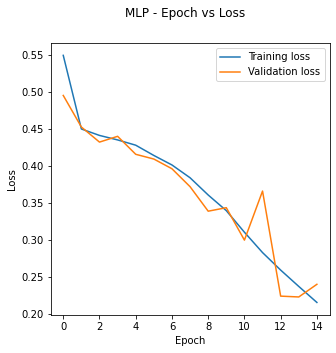

In [22]:
mlp_model=MLP_model(mlp_X_train, Y_train,mlp_X_val, Y_val)

In [23]:
# default threshold 0.5 used during training is used for prediction
mlp_train_pred = (mlp_model.predict(mlp_X_train) > 0.5).astype("int32")
print('MLP scores metrics for Train set')
print(sklearn.metrics.classification_report(Y_train, mlp_train_pred, labels=[0,1]))

MLP scores metrics for Train set
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     10664
           1       1.00      0.32      0.49      2062

    accuracy                           0.89     12726
   macro avg       0.94      0.66      0.71     12726
weighted avg       0.90      0.89      0.87     12726



###### Evaluating Model over validation data:

In [24]:
mlp_val_loss, mlp_val_acc = mlp_model.evaluate(mlp_X_val, Y_val)
print('MLP metrics for Validation set')
print('Accuracy: {:.2f}'.format(mlp_val_acc*100))
print('Loss: {:.2f}'.format(mlp_val_loss*100))

# default threshold 0.5 used during training is used for prediction
mlp_val_pred = (mlp_model.predict(mlp_X_val) > 0.5).astype("int32")
print(sklearn.metrics.classification_report(Y_val, mlp_val_pred, labels=[0,1]))

106/106 [==============================] - 0s 3ms/step - loss: 0.2404 - accuracy: 0.8862
MLP metrics for Validation set
Accuracy: 88.62
Loss: 24.04
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      2836
           1       1.00      0.30      0.46       548

    accuracy                           0.89      3384
   macro avg       0.94      0.65      0.70      3384
weighted avg       0.90      0.89      0.86      3384



### 1.4 Classification Comparison
General model for classification comparision over template matching for test set:

In [25]:
# Dataset reshape for template match
tm_X_test = dataset_reshape(test_ds, 'TM')

# Normalize dataset
tm_X_test = np.multiply(tm_X_test, 1.0/255.0)

In [26]:
tm_test_pred, tm_test_score = base_template_match(tm_X_test)
print('Template matching metrics for Test set')
tm_test_acc, tm_test_loss = validate_temp_match(tm_X_test, test_labels)
print('classification report for Template matching scores: Test set')
print(sklearn.metrics.classification_report(test_labels, tm_test_pred, labels=[0,1]))

Template matching metrics for Test set
Accuracy: 85.59%
Loss: 14.41%
classification report for Template matching scores: Test set
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1500
           1       0.69      0.10      0.17       270

    accuracy                           0.86      1770
   macro avg       0.78      0.55      0.55      1770
weighted avg       0.83      0.86      0.81      1770



In [27]:
# Dataset reshape for template match
mlp_X_test = dataset_reshape(test_ds, 'MLP')

# Normalize dataset
mlp_X_test = np.multiply(mlp_X_test, 1.0/255.0)

In [28]:
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(mlp_X_test, test_labels)
print('MLP metrics for Test set')
print('Accuracy: {:.2f}'.format(mlp_test_acc*100))
print('Loss: {:.2f}'.format(mlp_test_loss*100))

# default threshold 0.5 used during training is used for prediction
mlp_test_pred = (mlp_model.predict(mlp_X_test) > 0.5).astype("int32")
print(sklearn.metrics.classification_report(test_labels, mlp_test_pred, labels=[0,1]))

56/56 [==============================] - 0s 3ms/step - loss: 0.8354 - accuracy: 0.6802
MLP metrics for Test set
Accuracy: 68.02
Loss: 83.54
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1500
           1       0.16      0.25      0.19       270

    accuracy                           0.68      1770
   macro avg       0.50      0.50      0.50      1770
weighted avg       0.74      0.68      0.71      1770



##### Motivation discusiion:

For Template matching over all Data:
Template Matching - This is the base general approch that does not use and pre-defined methods from libraries.
All the techniques used in this model are based on trail and error approach. This model tries to generate the similarity 
score based on SSD(sum of squared differences) where the labels are assigned based on the threshold set manually to 0.039 
which is depicted from train error method using the scores from SSD.

For Train data:

Accuracy: 84.18 and Loss: 15.82
Here, the model has predicted 98% of disimilar and 13% of similar calss.
The weighted average F1-score is 80%.

For validation data:

Accuracy: 84.40 and Loss: 15.60
Here, the model has predicted 98% of disimilar and 14% of similar calss.
The weighted average F1-score is 80%.

For Test data:

Accuracy: 85.59 and Loss: 14.41
Here, the model has predicted 99% of disimilar and 10% of similar calss.
The weighted average F1-score is 81%.

We can clearly see from the metrics that model performance is same on train and validation datasets while for the test data it slightly
improved which is negligible.From this we can say that the threshold can generalize the unsee texture images fairly.

For Multi-Layer Perceptron over all Data:

Unlike the template matching approach, MLP necessitates training. To use roughly 12000 images to train the MLP model created in this notebook. However, utilising the SGD optimizer and batch normalisation and momentum, it was possible to train the weights faster.
Because the data is heavily skewed, the progression of binaary cross entropy loss across epochs is an important factor to consider when evaluating MLP performance.

For Train data:

Accuracy: 89.12 and Loss: 24.76
Here, the model has predicted 100% of disimilar and 32% of similar calss.
The weighted average F1-score is 87%.

For validation data:

Accuracy: 88.60 and Loss: 24.04
Here, the model has predicted 100% of disimilar and 30% of similar calss.
The weighted average F1-score is 86%.

For Test data:

Accuracy: 68.02 and Loss: 83.54
Here, the model has predicted 76% of disimilar and 25% of similar calss.
The weighted average F1-score is 71%.

In terms of the train and validation sets, the model appears to be sound. The train and validation sets have nearly identical accuracy (approx. 89%) and loss (approx. 24%).

MLP, on the other hand, has not been able to generalise to new datasets. The model has failed to notice the resemblance since the test set picture textures are never seen by the model. The majority class (dissimilar picture pairs - class 0) is simply predicted by the model.

    

### 1.5 Feature Engineering
Feature engineering:
To create a magnitude that isn't too sensitive to direction, it takes the square root of the sum of the squares of the horizontal and vertical Sobels. sobel returns a directional Sobel that must be processed further in order to conduct edge detection.

In [29]:
from skimage import filters
def edge_filter(img_arr):
    img_filter = []
    for j in range(len(img_arr)):
        sob = skimage.filters.sobel(img_arr[j])
        img_filter.append(sob)
    img_filter = np.array(img_filter)
    
    return img_filter

In [30]:
# Apply filters to each image before pairing
train_imgs,train_img_path = loadfiles(data_train)
test_imgs,test_img_path = loadfiles(data_test) 

train_filt_img = edge_filter(train_imgs)
test_filt_img = edge_filter(test_imgs)

C:\Users\Barghavi\Desktop\CNN\textures/training/canvas1
C:\Users\Barghavi\Desktop\CNN\textures/training/cushion1
C:\Users\Barghavi\Desktop\CNN\textures/training/linsseeds1
C:\Users\Barghavi\Desktop\CNN\textures/training/sand1
C:\Users\Barghavi\Desktop\CNN\textures/training/seat2
C:\Users\Barghavi\Desktop\CNN\textures/training/stone1
C:\Users\Barghavi\Desktop\CNN\textures/testing/canvas1
C:\Users\Barghavi\Desktop\CNN\textures/testing/cushion1
C:\Users\Barghavi\Desktop\CNN\textures/testing/linsseeds1
C:\Users\Barghavi\Desktop\CNN\textures/testing/sand1
C:\Users\Barghavi\Desktop\CNN\textures/testing/seat2
C:\Users\Barghavi\Desktop\CNN\textures/testing/stone1


In [31]:
# Creation of image pairs and dataset reshape for MLP training

train_feat = pairing_images(train_filt_img)
train_feat = dataset_reshape(train_feat, 'MLP')

test_feat = pairing_images(test_filt_img)
test_feat = dataset_reshape(test_feat, 'MLP')

print('Reshaped dataset size')
print('Train set:',train_feat.shape)
print('Test set: ',test_feat.shape)

Reshaped dataset size
Train set: (16110, 2048)
Test set:  (1770, 2048)


In [32]:
X_train_filt, X_val_filt, Y_train_filt, Y_val_filt = sklearn.model_selection.train_test_split(train_feat, train_labels, test_size=0.2,
                                                                         stratify=train_labels, random_state=0)
print('Train data size',X_train_filt.shape)
print('Validation data size',X_val_filt.shape)

Train data size (12888, 2048)
Validation data size (3222, 2048)


Epoch 1/15
403/403 - 3s - loss: 0.5053 - accuracy: 0.7968 - val_loss: 0.5028 - val_accuracy: 0.8380
Epoch 2/15
403/403 - 3s - loss: 0.4039 - accuracy: 0.8367 - val_loss: 0.3772 - val_accuracy: 0.8380
Epoch 3/15
403/403 - 3s - loss: 0.3724 - accuracy: 0.8374 - val_loss: 0.3409 - val_accuracy: 0.8380
Epoch 4/15
403/403 - 3s - loss: 0.3465 - accuracy: 0.8378 - val_loss: 0.3262 - val_accuracy: 0.8417
Epoch 5/15
403/403 - 3s - loss: 0.3203 - accuracy: 0.8402 - val_loss: 0.2985 - val_accuracy: 0.8457
Epoch 6/15
403/403 - 3s - loss: 0.2981 - accuracy: 0.8463 - val_loss: 0.2654 - val_accuracy: 0.8582
Epoch 7/15
403/403 - 3s - loss: 0.2683 - accuracy: 0.8633 - val_loss: 0.2275 - val_accuracy: 0.8880
Epoch 8/15
403/403 - 3s - loss: 0.2277 - accuracy: 0.8981 - val_loss: 0.1863 - val_accuracy: 0.9199
Epoch 9/15
403/403 - 3s - loss: 0.1779 - accuracy: 0.9299 - val_loss: 0.1443 - val_accuracy: 0.9354
Epoch 10/15
403/403 - 3s - loss: 0.1354 - accuracy: 0.9527 - val_loss: 0.0921 - val_accuracy: 0.9783

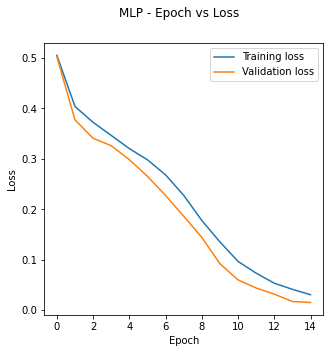

In [33]:
mlp_model_filt = MLP_model(X_train_filt, Y_train_filt,X_val_filt, Y_val_filt)

In [34]:
# default threshold 0.5 used during training is used for prediction
mlp_filt_train_pred = (mlp_model_filt.predict(X_train_filt) > 0.5).astype("int32")
print('Train scores')
print(sklearn.metrics.classification_report(Y_train_filt, mlp_filt_train_pred, labels=[0,1]))

Train scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10800
           1       1.00      1.00      1.00      2088

    accuracy                           1.00     12888
   macro avg       1.00      1.00      1.00     12888
weighted avg       1.00      1.00      1.00     12888



In [35]:
mlp_filt_val_loss, mlp_filt_val_acc = mlp_model_filt.evaluate(X_val_filt, Y_val_filt)
print('MLP (Feature Engineered) metrics for Validation set')
print('Accuracy: {:.2f}'.format(mlp_filt_val_acc*100))
print('Loss: {:.2f}'.format(mlp_filt_val_loss*100))
mlp_filt_val_pred = (mlp_model_filt.predict(X_val_filt) > 0.5).astype("int32")
print('Validation scores')
print(sklearn.metrics.classification_report(Y_val_filt, mlp_filt_val_pred, labels=[0,1]))

101/101 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9969
MLP (Feature Engineered) metrics for Validation set
Accuracy: 99.69
Loss: 1.54
Validation scores
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2700
           1       1.00      0.98      0.99       522

    accuracy                           1.00      3222
   macro avg       1.00      0.99      0.99      3222
weighted avg       1.00      1.00      1.00      3222



In [36]:
mlp_filt_test_loss, mlp_filt_test_acc = mlp_model_filt.evaluate(test_feat, test_labels)
print('MLP (Feature Engineered) metrics for Test set')
print('Accuracy: {:.2f}'.format(mlp_filt_test_acc*100))
print('Loss: {:.2f}'.format(mlp_filt_test_loss*100))
mlp_filt_test_pred = (mlp_model_filt.predict(test_feat) > 0.5).astype("int32")
print('Test scores')
print(sklearn.metrics.classification_report(test_labels, mlp_filt_test_pred, labels=[0,1]))

56/56 [==============================] - 0s 3ms/step - loss: 0.7476 - accuracy: 0.7667
MLP (Feature Engineered) metrics for Test set
Accuracy: 76.67
Loss: 74.76
Test scores
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      1500
           1       0.37      0.76      0.50       270

    accuracy                           0.77      1770
   macro avg       0.66      0.76      0.67      1770
weighted avg       0.86      0.77      0.79      1770



#### Feature Engineering Discussion:


For Multi-Layer Perceptron over all Data:

For Train data:

Accuracy: 100 and Loss: 1.76
Here, the model has predicted 100% of disimilar and 100% of similar calss.
The weighted average F1-score is 100%.

For validation data:

Accuracy: 99.69 and Loss: 1.54
Here, the model has predicted 100% of disimilar and 100% of similar calss.
The weighted average F1-score is 100%.

For Test data:

Accuracy: 76.67 and Loss: 74.76
Here, the model has predicted 77% of disimilar and 76% of similar calss.
The weighted average F1-score is 79%.

In terms of the train and validation sets, the model appears to be sound. The train and validation sets have nearly identical accuracy (approx. 100%) and loss (approx. 1.5%).

The MLP model with designed features converged faster than the standard MLP model. With only 15 epochs, the feature designed MLP model achieved an approximate accuracy of 100% and a loss of 1%. With 15 epochs, the standard MLP model achieved an accuracy of 84 percent and a loss of 15%. With same epochs and lesser acceleration momentum, the feature-trained MLP model performed better.

The sobel filter improved the pixel intensity and features of the images, making it easier for the MLP model to read and learn.
MLP's performance has been shown to be boosted by pixel value increases. Given a balanced dataset, it is certain that using additional feature engineering approaches will increase the performance of an MLP model.

When compared to the train and validation sets, the model's performance on the test set is poor. This is due to unbalanced data with a very low fraction of data in related image pair classes. The performance of both MLP models on similar image pair classes (class 1) is poor, implying that the model requires more images in class 1 to train and learn.
